
# Lecture 14. Visualizing Optimization Algorithms

> Eunmi Kim    
 계산과학 프로그래밍 및 실습


---
source from https://notebook.community/ltiao/notebooks/visualizing-and-animating-optimization-algorithms-with-matplotlib

In [ ]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from collections import defaultdict
from itertools import zip_longest
from functools import partial

## 시험용 함수

시험용 함수는 다음과 같고,

$f(x, y)=(1.5−x+xy)^2+(2.25−x+xy^2)^2+(2.625−x+xy^33)^2$


$f(x, y)$는 $(3, 0.5)$에서 global minimum을 갖는다.

In [ ]:
f  = lambda x: (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

In [ ]:
minima = np.array([3., .5])

In [ ]:
f(minima)

0.0

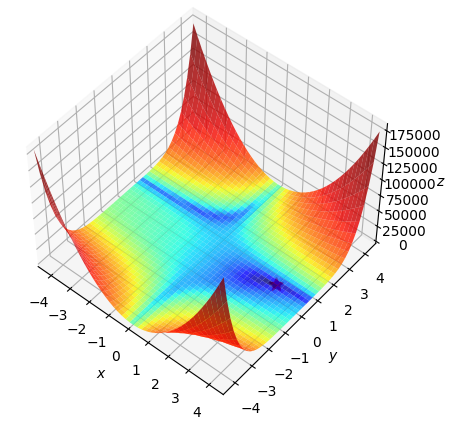

In [ ]:
# 3D plot

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f([x, y])

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot([3.0], [0.5], [f(minima)], 'r*', markersize=10)   #global minimum 별표시

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

(-4.5, 4.5)

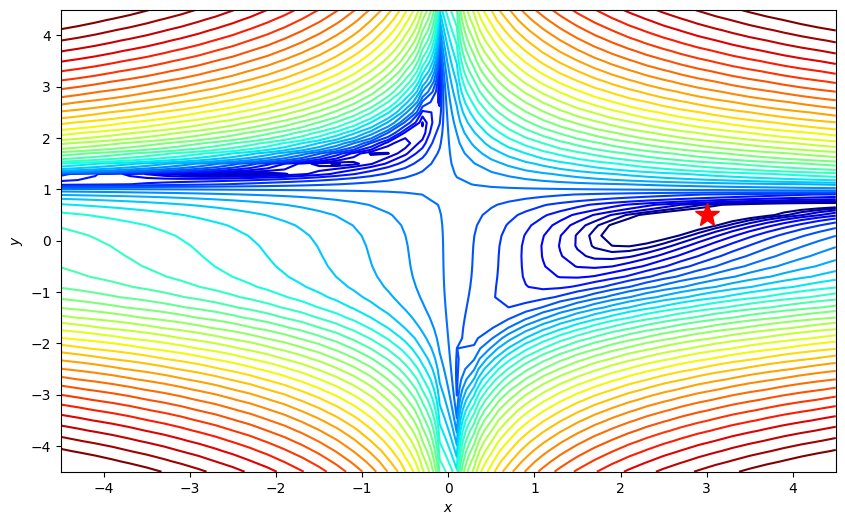

In [ ]:
# 2D Contour Plot

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

## 경사하강법

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4     # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

In [ ]:
def gradient_descent(func, init_x, lr=0.01, iteration=100):
    x = init_x
    x_history = [init_x.copy()]       # init_x의 값만 가져와서 list에 추가

    for i in range(iteration):
        grad = numerical_gradient(func, x)
        x -= lr * grad
        x_history.append(x.copy())

    return x, np.array(x_history)

In [ ]:
init_x = np.array([1.0, 1.8])
lr = 0.003
iteration = 1000
func = f

x_last, x_history = gradient_descent(func, init_x, lr=lr, iteration=iteration)

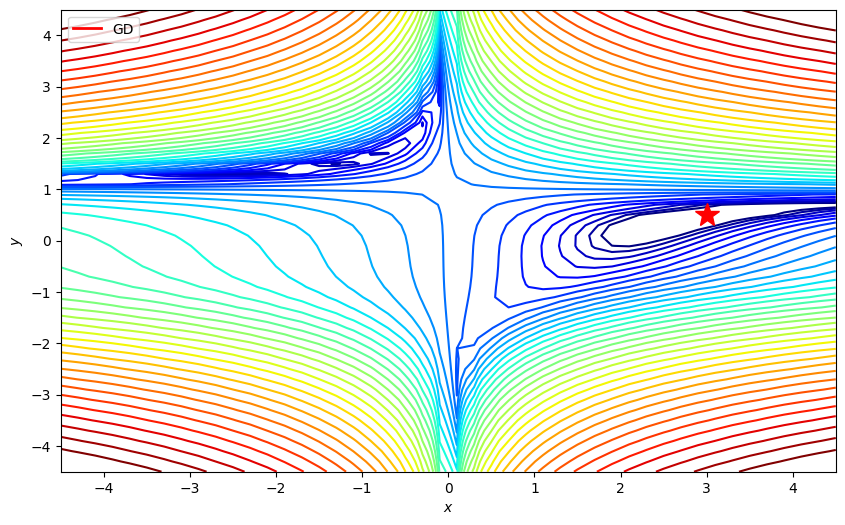

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=18)

line, = ax.plot([], [], 'r', label='GD', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [ ]:
# path를 animation으로 그리기

path = x_history.T

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(path[::, :i])
    point.set_data(path[::, i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60,
                               repeat_delay=5, blit=True)

HTML(anim.to_html5_video())

## Momentum

In [ ]:
def Momentum(func, init_x, lr=0.01, mu=0.9, iteration=100):
    v = np.zeros_like(init_x)
    x = init_x
    x_history = [init_x.copy()]

    for i in range(iteration):
        v = mu * v - lr * numerical_gradient(func, x)
        x += v

        x_history.append(x.copy())

    return x, np.array(x_history)

In [ ]:
init_x = np.array([1.0, 1.8])
lr = 0.003
iteration = 200
func = f

x_last, x_history_m = Momentum(func, init_x, lr=lr, iteration=iteration)

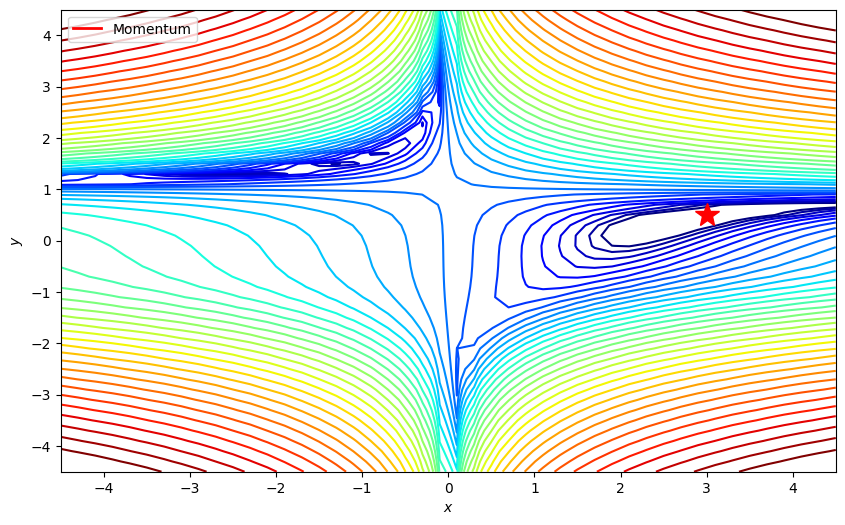

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=18)

line, = ax.plot([], [], 'r', label='Momentum', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [ ]:
# path를 animation으로 그리기

path = x_history_m.T

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(path[::,:i])
    point.set_data(path[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60,
                               repeat_delay=5, blit=True)

HTML(anim.to_html5_video())

## RMSProp

In [ ]:
def RMSProp(func, init_x, lr=0.01, gamma=0.99, iteration=100):
    h = np.zeros_like(init_x)
    x = init_x
    x_history = [init_x.copy()]

    for i in range(iteration):
        grad = numerical_gradient(func, x)
        h *= gamma
        h += (1.0 - gamma) * grad * grad
        x -= lr * grad /(np.sqrt(h) + 1e-7)
        x_history.append(x.copy())

    return x, np.array(x_history)

In [ ]:
init_x = np.array([1.0, 1.8])
lr = 0.05
iteration = 400
func = f

x_last, x_history_r = RMSProp(func, init_x, lr=lr, iteration=iteration)

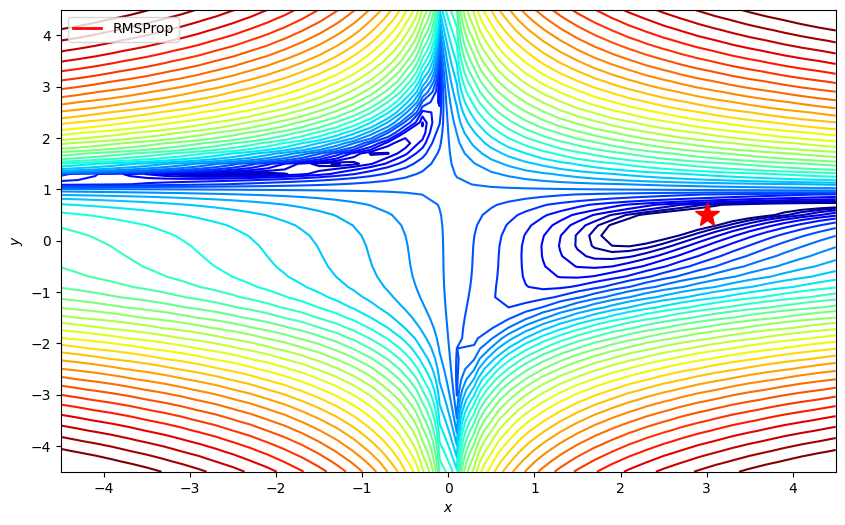

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=18)

line, = ax.plot([], [], 'r', label='RMSProp', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [ ]:
# path를 animation으로 그리기

path = x_history_r.T

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(path[::,:i])
    point.set_data(path[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60,
                               repeat_delay=5, blit=True)

HTML(anim.to_html5_video())

## ADAM

In [ ]:
def ADAM(func, init_x, lr=0.01,  beta1=0.9, beta2=0.999, iteration=100):
    m = np.zeros_like(init_x)
    v = np.zeros_like(init_x)
    x = init_x
    x_history = [init_x.copy()]

    for i in range(1, iteration+1):
        lr_i  = lr * np.sqrt(1.0 - beta2**i) / (1.0 - beta1**i)

        grad = numerical_gradient(func, x)

        m += (1 - beta1) * (grad - m)
        v += (1 - beta2) * (grad**2 - v)

        x -= lr_i * m /(np.sqrt(v) + 1e-7)

        x_history.append(x.copy())

    return x, np.array(x_history)

In [ ]:
init_x = np.array([1.0, 1.8])
lr = 0.05
iteration = 700
func = f

x_last, x_history_a = ADAM(func, init_x, lr=lr, iteration=iteration)

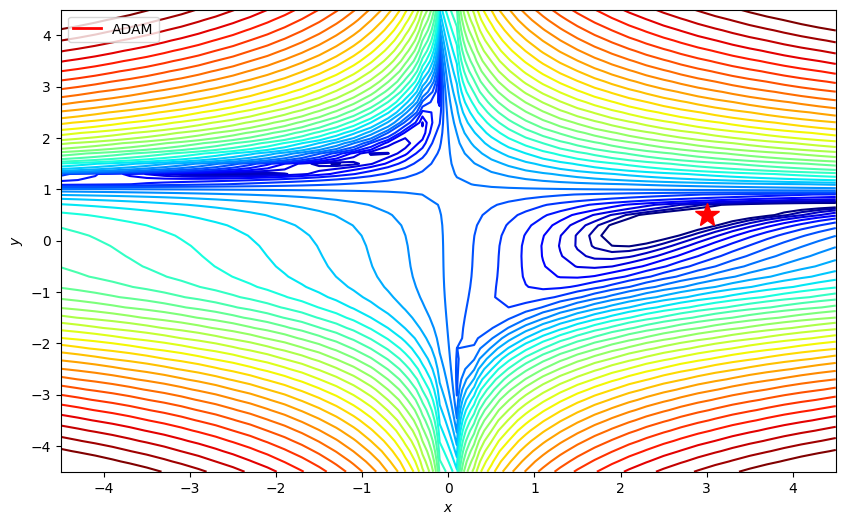

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=18)

line, = ax.plot([], [], 'r', label='ADAM', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [ ]:
# path를 animation으로 그리기

path = x_history_a.T

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(path[::,:i])
    point.set_data(path[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60,
                               repeat_delay=5, blit=True)

HTML(anim.to_html5_video())

## 비교

In [ ]:
class TrajectoryAnimation(animation.FuncAnimation):

    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None,
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax

        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)

        self.lines = [ax.plot([], [], label=label, lw=2)[0]
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0]
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [ ]:
methods = ['GD', 'Momentum', 'RMSProp', 'ADAM']
paths = [x_history.T,  x_history_m.T, x_history_r.T, x_history_a.T]

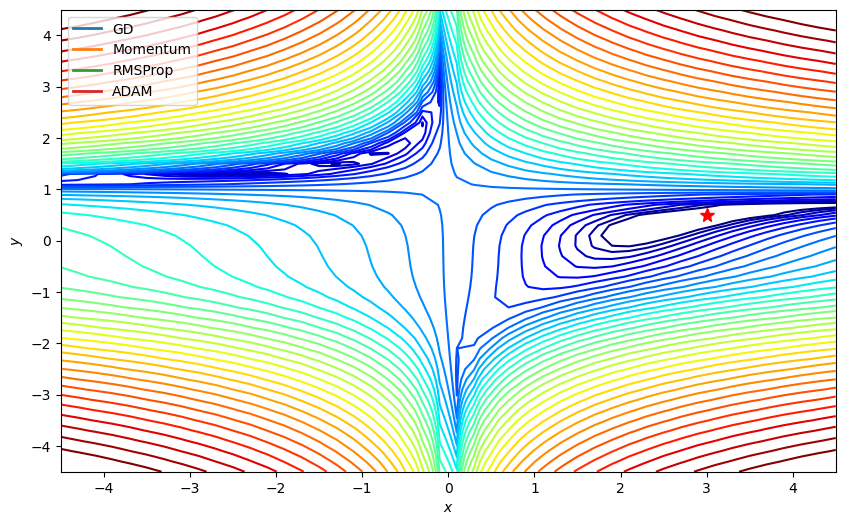

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=methods, ax=ax)

ax.legend(loc='upper left')

In [ ]:
HTML(anim.to_html5_video())